Обзор годовых отчетов о заработной плате

Заработная плата для определения корреляции между годовой зарплатой, возрастом, полом, уровнем образования

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<class 'pandas.core.frame.DataFrame'>
Index: 99569 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               99569 non-null  int64  
 1   income           99569 non-null  float64
 2   age              99569 non-null  int64  
 3   gender           99569 non-null  object 
 4   education_level  99569 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.6+ MB


<Axes: >

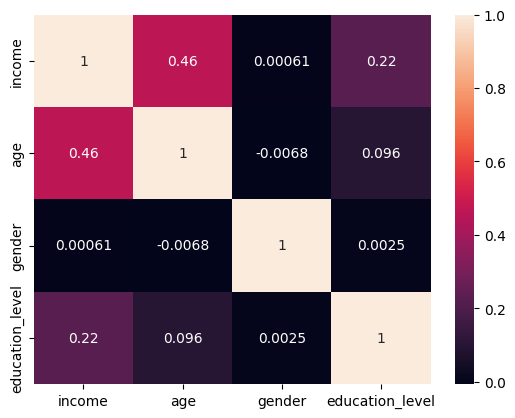

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
import time

# Игнорирование предупреждений (опционально)
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('anual-salary-reports-survey/salary_data.csv')

df = df.dropna()
df.info()

gender = {  # Replace text object to 1/0
    'M': 1, 'F': 0
}
df['gender'] = df['gender'].map(gender)
"""
gender_type = pd.get_dummies(df["gender"])  # Convert "gender" with text obj value to "F", "М" with bool value
df = pd.concat([df, gender_type], axis=1)
df.drop("gender", axis=1, inplace=True)
"""
df.drop("ID",axis=1,inplace=True)

# Разделение данных на обучающую и тестовую выборки
data = df.drop("income", axis=1)
target = df["income"]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


sns.heatmap(df.corr(),annot=True)


In [55]:
data.head()

,age,gender,education_level
0,45,1,2.0
1,30,1,2.0
2,22,1,2.0
3,36,1,2.0
4,51,1,1.0


Text(0, 0.5, 'Доход')

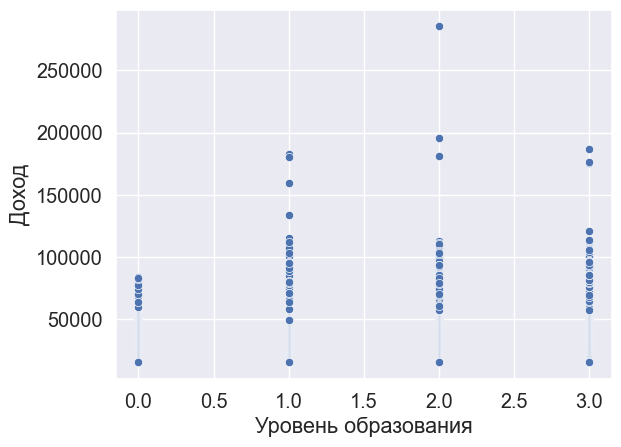

In [ ]:
sns.scatterplot(x='education_level', y='income', data=df)
plt.xlabel('Уровень образования')
plt.ylabel('Доход')

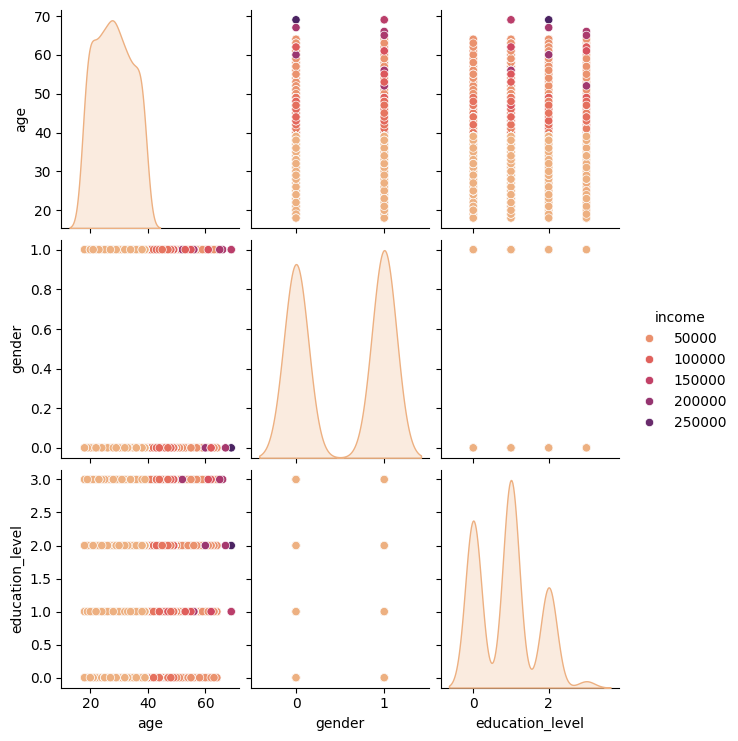

In [72]:
sns.pairplot(
    data=df,
    aspect=.85,
    palette="flare",
    hue='income')

(0.0, 100000.0)

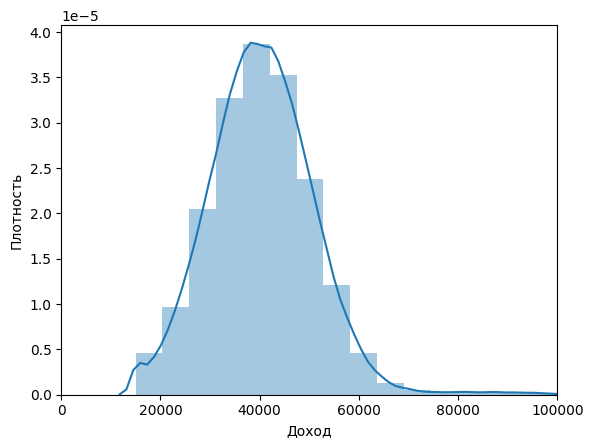

In [66]:
sns.distplot(df["income"])
plt.xlabel('Доход')
plt.ylabel('Плотность')
plt.xlim(0,100000)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 55
[LightGBM] [Info] Number of data points in the train set: 79655, number of used features: 3
[LightGBM] [Info] Start training from score 40397.331612
Затрачено времени на Регрессор LGBM: 1.507021427154541 сек
*****************
Метрики качества модели LGBM :
*****************
Средняя абсолютная ошибка (MAE): 6731.22
Среднеквадратичная ошибка (MSE): 77809807.32
Корень среднеквадратичной ошибки (RMSE): 8820.99
Коэффициент детерминации (R²): 0.33


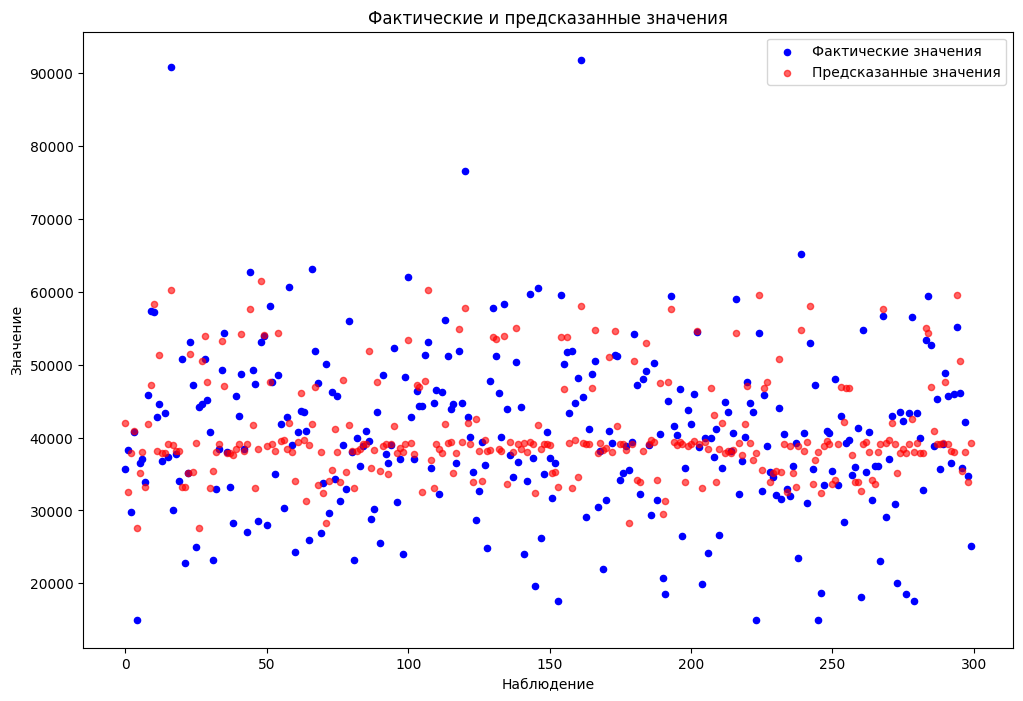

In [59]:
# Регрессор LGBM

from lightgbm import LGBMRegressor

start = time.time()  # Фиксируем время старта

# Создание модели LGBMRegressor
model = LGBMRegressor(num_leaves = 10, learning_rate = 0.05, n_estimators = 500)

# Best parameters found: LGBMRegressor(num_leaves = 31, learning_rate = 0.01, n_estimators = 500, max_depth = 10)

model.fit(X_train, y_train)


# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

elapsed = time.time() - start # Останавливаем таймер
print(f"Затрачено времени на Регрессор LGBM: {elapsed} сек")

print(f'*****************')
print(f'Метрики качества модели LGBM :')
print(f'*****************')
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')
print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}')
print(f'Коэффициент детерминации (R²): {r2:.2f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(12, 8))
plt.scatter(range(0,300), y_test[:300], color='blue', label='Фактические значения', s=20)
plt.scatter(range(0,300), y_pred[:300], color='red', label='Предсказанные значения', s=20, alpha=0.6)
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 55
[LightGBM] [Info] Number of data points in the train set: 79655, number of used features: 3
[LightGBM] [Info] Start training from score 40397.331612
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 55
[LightGBM] [Info] Number of data points in the train set: 79655, number of used features: 3
[LightGBM] [Info] Start training from score 40397.331612
Best parameters found: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'num_leaves': 31}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 55
[LightGBM] [Info]

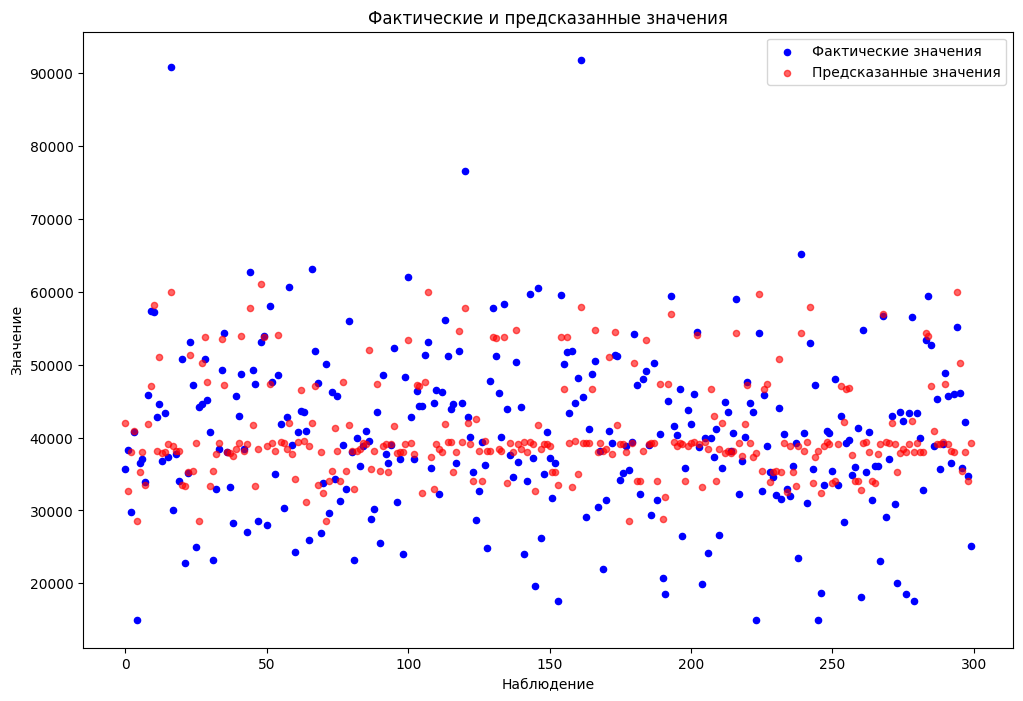

In [65]:
# Регрессор LGBM с подбором параметров

start = time.time()  # Фиксируем время старта

# Создание модели LGBMRegressor
model = LGBMRegressor()

model.fit(X_train, y_train)

# Определение параметров для подбора
param_grid = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_depth': [-1, 10, 20]
}

# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Использование лучших параметров для обучения модели
best_model = LGBMRegressor(**best_params)
best_model.fit(X_train, y_train)

# Предсказание на лучшей тестовой выборке
y_pred = best_model.predict(X_test)



# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

elapsed = time.time() - start # Останавливаем таймер
print(f"Затрачено времени на Регрессор LGBM с подбором параметров: {elapsed} сек")

print(f'*****************')
print(f'Метрики качества модели LGBM с подбором параметров:')
print(f'*****************')
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')
print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}')
print(f'Коэффициент детерминации (R²): {r2:.2f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(12, 8))
plt.scatter(range(0,300), y_test[:300], color='blue', label='Фактические значения', s=20)
plt.scatter(range(0,300), y_pred[:300], color='red', label='Предсказанные значения', s=20, alpha=0.6)
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

Затрачено времени на Регрессор ExtraTreesRegressor: 2.2869508266448975 сек
*****************
Метрики качества модели Extra Trees Regressor:
*****************
Средняя абсолютная ошибка (MAE): 6731.90
Среднеквадратичная ошибка (MSE): 77303859.59
Корень среднеквадратичной ошибки (RMSE): 8792.26
Коэффициент детерминации (R²): 0.33


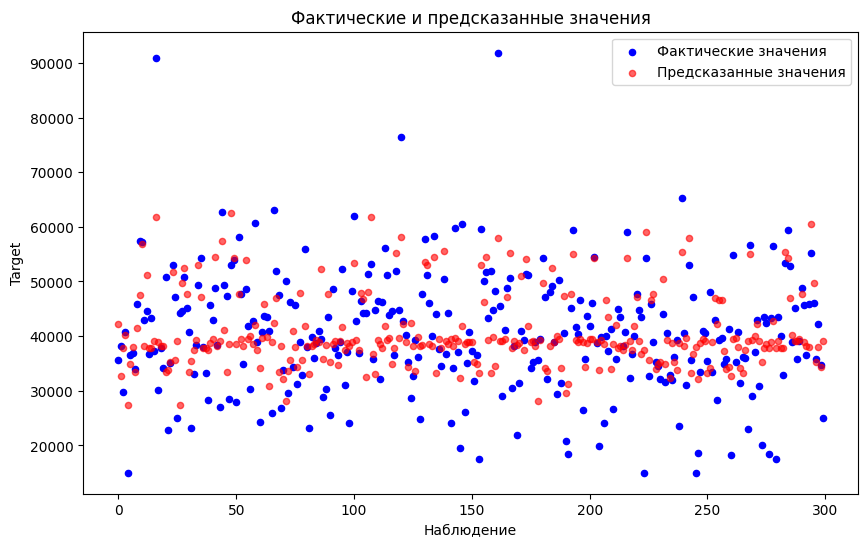

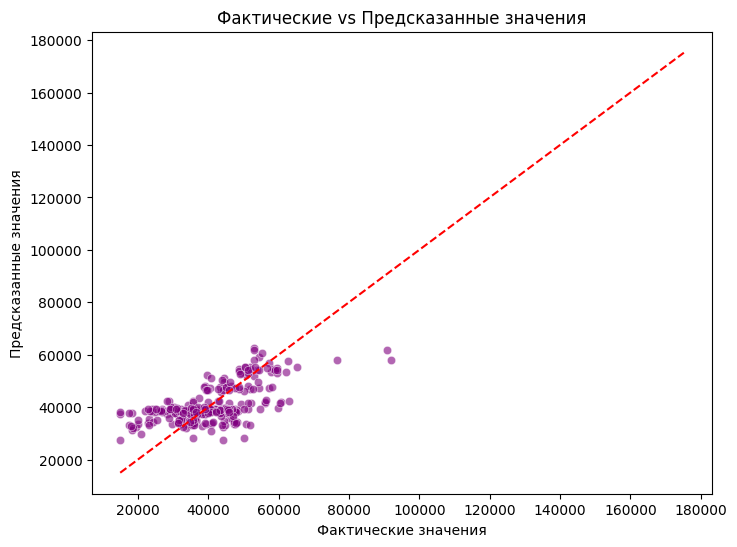

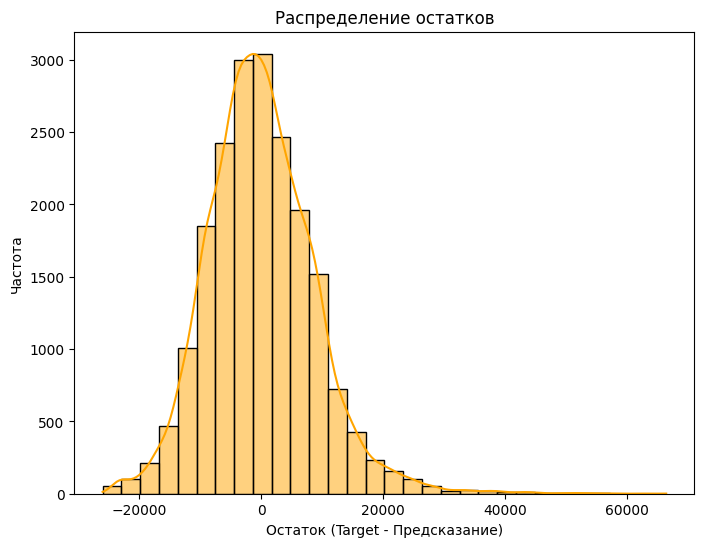

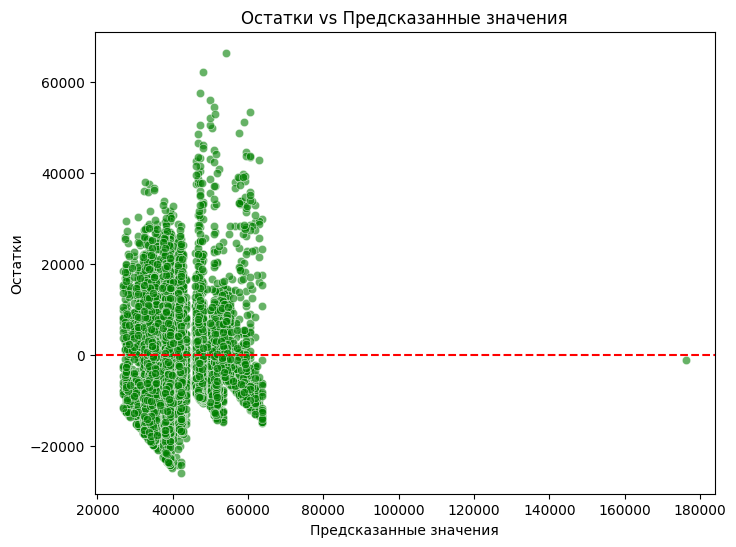

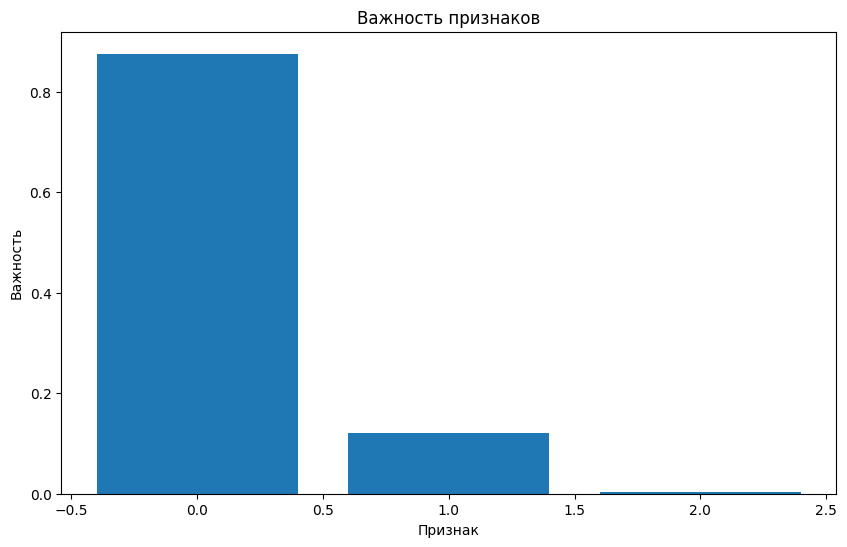

In [60]:
# Регрессор ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

# Создание и обучение модели Extra Trees Regressor
etr = ExtraTreesRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

start = time.time()  # Фиксируем время старта
etr.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = etr.predict(X_test)

elapsed = time.time() - start # Останавливаем таймер
print(f"Затрачено времени на Регрессор ExtraTreesRegressor: {elapsed} сек")

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества модели Extra Trees Regressor:')
print(f'*****************')
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')
print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}')
print(f'Коэффициент детерминации (R²): {r2:.2f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(0,300), y_test[:300], color='blue', label='Фактические значения', s=20)
plt.scatter(range(0,300), y_pred[:300], color='red', label='Предсказанные значения', s=20, alpha=0.6)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

# Диаграмма предсказанных vs фактических значений
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test[:300], y=y_pred[:300], color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения')
plt.show()

# График остатков
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='orange')
plt.title('Распределение остатков')
plt.xlabel('Остаток (Target - Предсказание)')
plt.ylabel('Частота')
plt.show()

# Остатки vs Предсказанные значения
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')
plt.show()

# Важность признаков
importances = etr.feature_importances_
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.bar(range(data.shape[1]), importances[indices], align='center', data=data)
plt.title('Важность признаков')
plt.xlabel('Признак')
plt.ylabel('Важность')
plt.show()

Затрачено времени на Регрессор Bayesian Ridge Regression: 0.02931809425354004 сек
*****************
Метрики качества модели Bayesian Ridge Regression:
*****************
Средняя абсолютная ошибка (MAE): 6968.71
Среднеквадратичная ошибка (MSE): 86591074.74
Корень среднеквадратичной ошибки (RMSE): 9305.43
Коэффициент детерминации (R²): 0.25


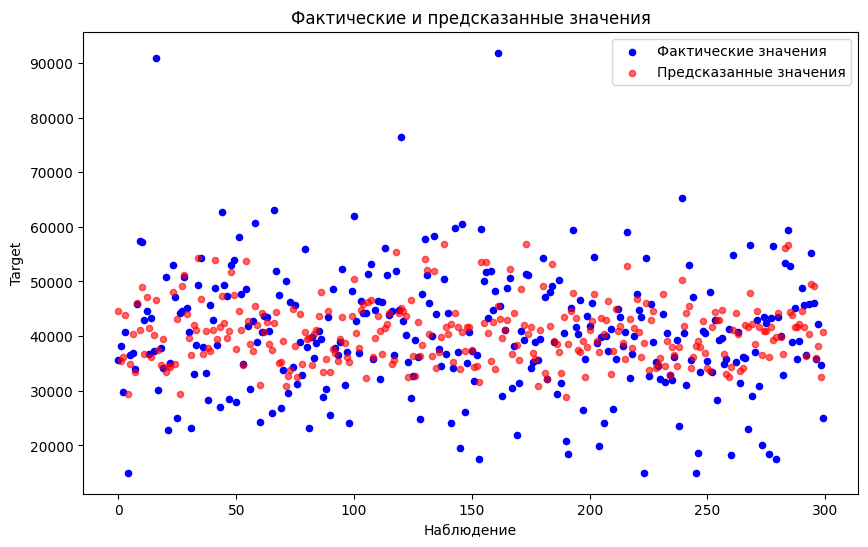

In [61]:
# Регрессор Bayesian Ridge Regression
from sklearn.linear_model import BayesianRidge

start = time.time()  # Фиксируем время старта

# Создание и обучение модели Bayesian Ridge Regression
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = bayesian_ridge.predict(X_test)

elapsed = time.time() - start # Останавливаем таймер
print(f"Затрачено времени на Регрессор Bayesian Ridge Regression: {elapsed} сек")


# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества модели Bayesian Ridge Regression:')
print(f'*****************')
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')
print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}')
print(f'Коэффициент детерминации (R²): {r2:.2f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(0,300), y_test[:300], color='blue', label='Фактические значения', s=20)
plt.scatter(range(0,300), y_pred[:300], color='red', label='Предсказанные значения', s=20, alpha=0.6)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()


Затрачено времени на  DecisionTreeRegressor: 0.047952890396118164 сек
*****************
Метрики качества модели DecisionTreeRegressor:
*****************
Средняя абсолютная ошибка (MAE): 6731.90
Среднеквадратичная ошибка (MSE): 77303866.06
Корень среднеквадратичной ошибки (RMSE): 8792.26
Коэффициент детерминации (R²): 0.33


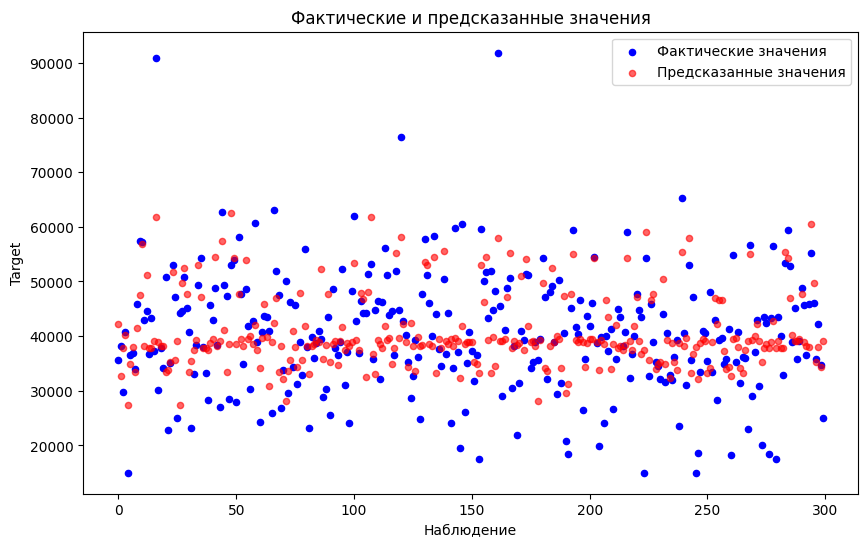

In [62]:
# Регрессор дерева решений DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

start = time.time()  # Фиксируем время старта

# Инициализируем и обучаем модель регрессора дерева решений
model = DecisionTreeRegressor(splitter="best", max_depth=50, random_state=42)


model.fit(X_train,y_train)

# Сделаем предсказания
y_pred = model.predict(X_test)

elapsed = time.time() - start # Останавливаем таймер
print(f"Затрачено времени на  DecisionTreeRegressor: {elapsed} сек")

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества модели DecisionTreeRegressor:')
print(f'*****************')
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')
print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}')
print(f'Коэффициент детерминации (R²): {r2:.2f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(0,300), y_test[:300], color='blue', label='Фактические значения', s=20)
plt.scatter(range(0,300), y_pred[:300], color='red', label='Предсказанные значения', s=20, alpha=0.6)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

Затрачено времени на  OrthogonalMatchingPursuit: 0.009980440139770508 сек
*****************
Метрики качества модели Ортогональный поиск соответствия:
*****************
Средняя абсолютная ошибка (MAE): 7031.32
Среднеквадратичная ошибка (MSE): 90363874.00
Корень среднеквадратичной ошибки (RMSE): 9505.99
Коэффициент детерминации (R²): 0.22


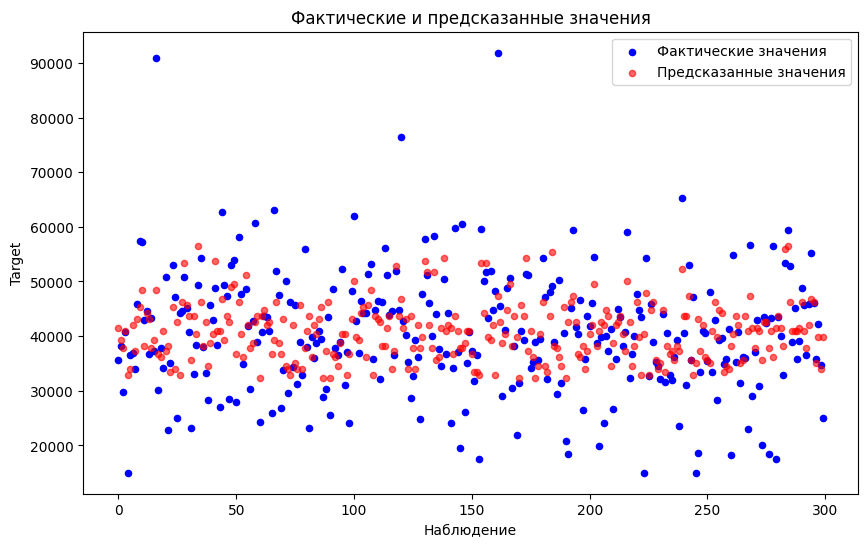

In [63]:
# Регрессор OrthogonalMatchingPursuit (Ортогональный поиск соответствия)

from sklearn.linear_model import OrthogonalMatchingPursuit

start = time.time()  # Фиксируем время старта

# Инициализируем и обучаем модель ортогонального поиска соответствия (OMP)
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=1)  # Выберем только один признак
omp.fit(X_train,y_train)

# Вычисляем предсказания с использованием выбранных признаков
y_pred = omp.predict(X_test)

elapsed = time.time() - start # Останавливаем таймер
print(f"Затрачено времени на  OrthogonalMatchingPursuit: {elapsed} сек")

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества модели Ортогональный поиск соответствия:')
print(f'*****************')
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')
print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}')
print(f'Коэффициент детерминации (R²): {r2:.2f}')


# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(0,300), y_test[:300], color='blue', label='Фактические значения', s=20)
plt.scatter(range(0,300), y_pred[:300], color='red', label='Предсказанные значения', s=20, alpha=0.6)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()


Затрачено времени на  ElasticNet: 0.017691612243652344 сек
*****************
Метрики качества модели ElasticNet:
*****************
Средняя абсолютная ошибка (MAE): 6962.36
Среднеквадратичная ошибка (MSE): 86612149.00
Корень среднеквадратичной ошибки (RMSE): 9306.56
Коэффициент детерминации (R²): 0.25


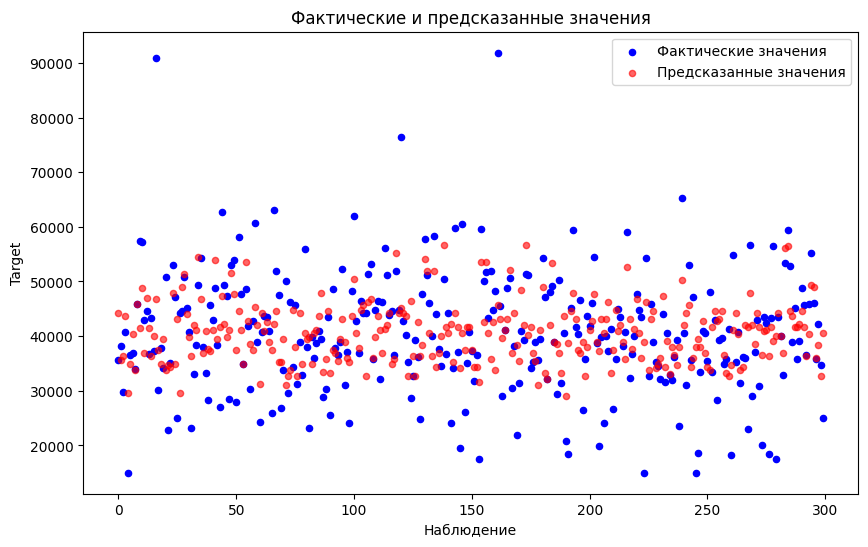

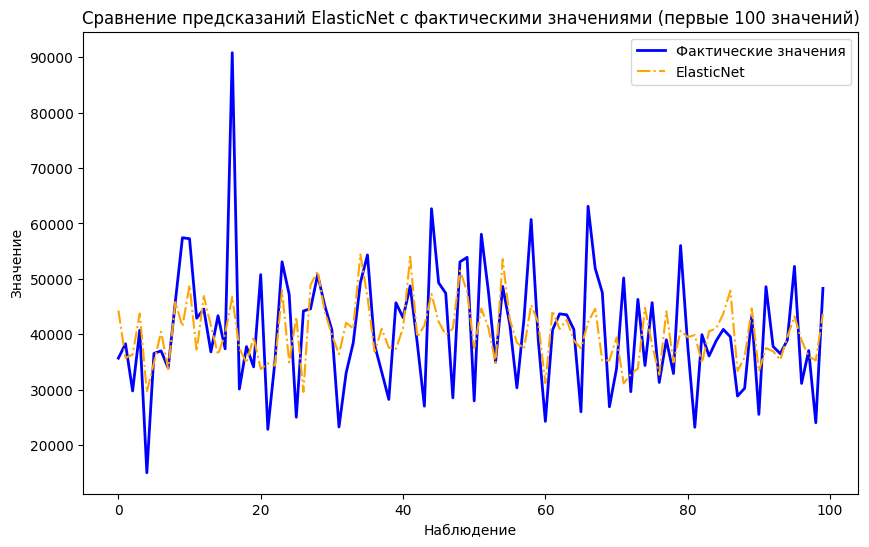

In [64]:
# Регрессор модель ElasticNet

from sklearn.linear_model import ElasticNet

start = time.time()  # Фиксируем время старта

# Создаем модель ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Обучаем модель ElasticNet
elastic_net.fit(X_train, y_train)

# Делаем прогнозы на тестовом наборе
y_pred = elastic_net.predict(X_test)

elapsed = time.time() - start # Останавливаем таймер
print(f"Затрачено времени на  ElasticNet: {elapsed} сек")

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'*****************')
print(f'Метрики качества модели ElasticNet:')
print(f'*****************')
print(f'Средняя абсолютная ошибка (MAE): {mae:.2f}')
print(f'Среднеквадратичная ошибка (MSE): {mse:.2f}')
print(f'Корень среднеквадратичной ошибки (RMSE): {rmse:.2f}')
print(f'Коэффициент детерминации (R²): {r2:.2f}')

# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(0,300), y_test[:300], color='blue', label='Фактические значения', s=20)
plt.scatter(range(0,300), y_pred[:300], color='red', label='Предсказанные значения', s=20, alpha=0.6)
plt.xlabel('Наблюдение')
plt.ylabel('Target')
plt.title('Фактические и предсказанные значения')
plt.legend()
plt.show()

# Визуализируем предсказания ElasticNet и фактические значения (первые 100 значений)
plt.figure(figsize=(10, 6))
plt.plot(range(100), y_test.iloc[:100], label='Фактические значения', color='blue', linewidth=2)
plt.plot(range(100), y_pred[:100], label='ElasticNet', color='orange', linestyle='-.')

plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Сравнение предсказаний ElasticNet с фактическими значениями (первые 100 значений)')
plt.legend()
plt.show()